<a href="https://colab.research.google.com/github/manishbayesian/bayesianbookpub/blob/main/Chapter1_Example3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter 1, Example 3. Hash Collision/Birthday Problem
For a one byte hash (i.e. 256 distinct values), we see it takes under 20 operations for the collision probability to exceed 50%. This an application of the famous "birthday paradox" also shown below.

In [ ]:
from scipy import special
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

sns.set_theme(style="darkgrid")

In [ ]:
# probability of hash collision (for a single byte hash) after n random operations
def no_collision_prob(n, HASHLEN=256):
  return special.perm(HASHLEN,n)/(HASHLEN**n)


In [ ]:
## plot probability of hash collision with operations
hashcols = {n:1.-no_collision_prob(n) for n in range(100)}

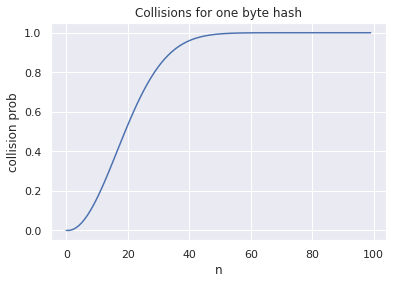

In [ ]:
sns.lineplot(data=pd.DataFrame({'n':hashcols.keys(),'collision prob': hashcols.values()}), 
             x='n',y='collision prob').set(title='Collisions for one byte hash')
plt.show()

#### The Famous Birthday "Paradox".
_If you are in a room with N people, what is the probability that at least two people have the same birthday?_ 

The hash collision example above is a variation of this apparent "paradox" because it takes N=23 for this collision probability to exceed 0.5, which is counterintuitive to a possible (incorrect) intuition that this value would be 365/2. 

In [ ]:
birthday_probs = {n:1.-no_collision_prob(n,365) for n in range(100)}

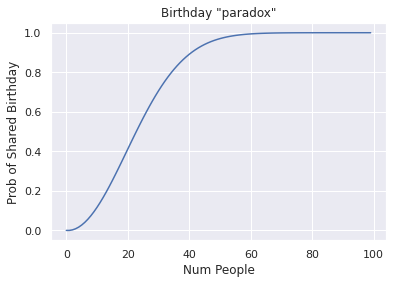

In [ ]:
sns.lineplot(data=pd.DataFrame({'Num People':birthday_probs.keys(),'Prob of Shared Birthday': birthday_probs.values()}), 
             x='Num People',y='Prob of Shared Birthday').set(title='Birthday "paradox"')
plt.show()

### Simulation ("Frequentist") Approach to the Hash Collision Problem
Using a simulation method using 10000 trials gives us a similar result to the analytic solution above.


In [ ]:
N_TRIALS=10000

def estimate_collision_prob(n, HASHLEN=256):
  num_colls = 0
  for t in range(N_TRIALS):
    hashes = random.randint(1,HASHLEN, size=n)
    if len(set(hashes)) < n:
      num_colls += 1
  return 1.*num_colls/N_TRIALS




In [ ]:
sim_hashcols = {n:estimate_collision_prob(n) for n in range(100)}

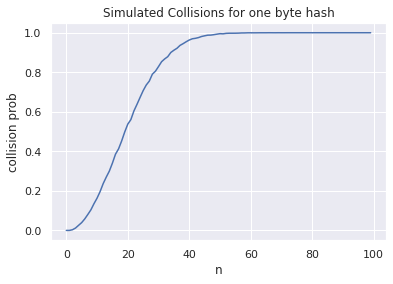

In [ ]:
sns.lineplot(data=pd.DataFrame({'n':sim_hashcols.keys(),'collision prob': sim_hashcols.values()}), 
             x='n',y='collision prob').set(title='Simulated Collisions for one byte hash')
plt.show()